클러스터링
==
데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

데이터 읽기
--

In [2]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [3]:
power_data.head().T

0   1          2         3         4
구분           강원  개성         경기        경남        경북
주거용     1940933   0   16587710   4260988   3302463
공공용     1400421   0    5533662   1427560   1578115
서비스업    6203749   0   33434551   8667737   8487402
업무용합계   7604170   0   38968213  10095297  10065517
농림어업     607139   0    2371347   2141813   1747462
광업       398287   0     317263     95989    224568
제조업     6002286   0   56603327  18053778  30115601
식료품제조    546621   0    2544420    932743    566071
섬유,의류     13027   0    2109963    346974   3780171
목재,나무     19147   0     529274     60160     72680
펄프,종이     24382   0    1917458    817685    361772
출판,인쇄      7727   0     731348     28486     44402
석유,화확    175323   0    6881775   1865583   3653665
의료,광학     84397   0    1336390    178498    217771
요업      3695776   0    1728379    429920   1269917
1차금속    1038913   0    2020196   3809547  10874970
조립금속      39477   0    2302355   1699879    933178
기타기계      35063   0    3613798   1902913    782570
사무기기       2019   0     317244      8070     14468
전기기기      38062   0    1040171    924235    750786
영상,음향     43986   0   24519644    534196   4174971
자동차      113448   0    2977165   2156059   2356890
기타운송     108629   0      67594   2048646    123935
가구및기타     12872   0    1833112    262523     60280
재생재료       3418   0     133041     47662     77104
산업용합계   7007712   0   59291937  20291580  32087631
합계     16552816   0  114847859  34647864  45455611

In [4]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'], errors='ignore')

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [5]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

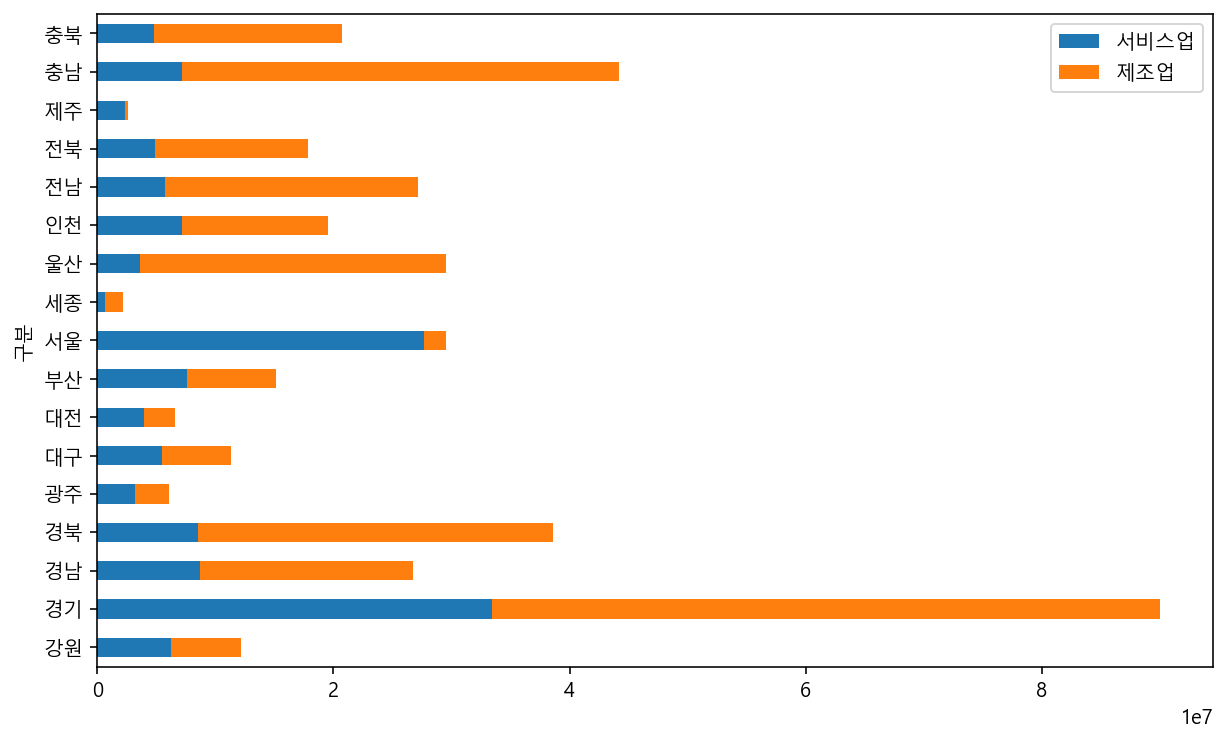

In [6]:
see2 = ['서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [7]:
power = power[['서비스업', '제조업']]
power.head(5)

서비스업       제조업
구분                    
강원   6203749   6002286
경기  33434551  56603327
경남   8667737  18053778
경북   8487402  30115601
광주   3174973   2910768

In [8]:
power[see2].head()

서비스업       제조업
구분                    
강원   6203749   6002286
경기  33434551  56603327
경남   8667737  18053778
경북   8487402  30115601
광주   3174973   2910768

스캐터 플롯
--

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [10]:
power = power.drop(['경기', '서울'])
power.shape

(15, 2)

In [11]:
n_samples = power.shape[0] ; n_samples

15

덴드로그램
--


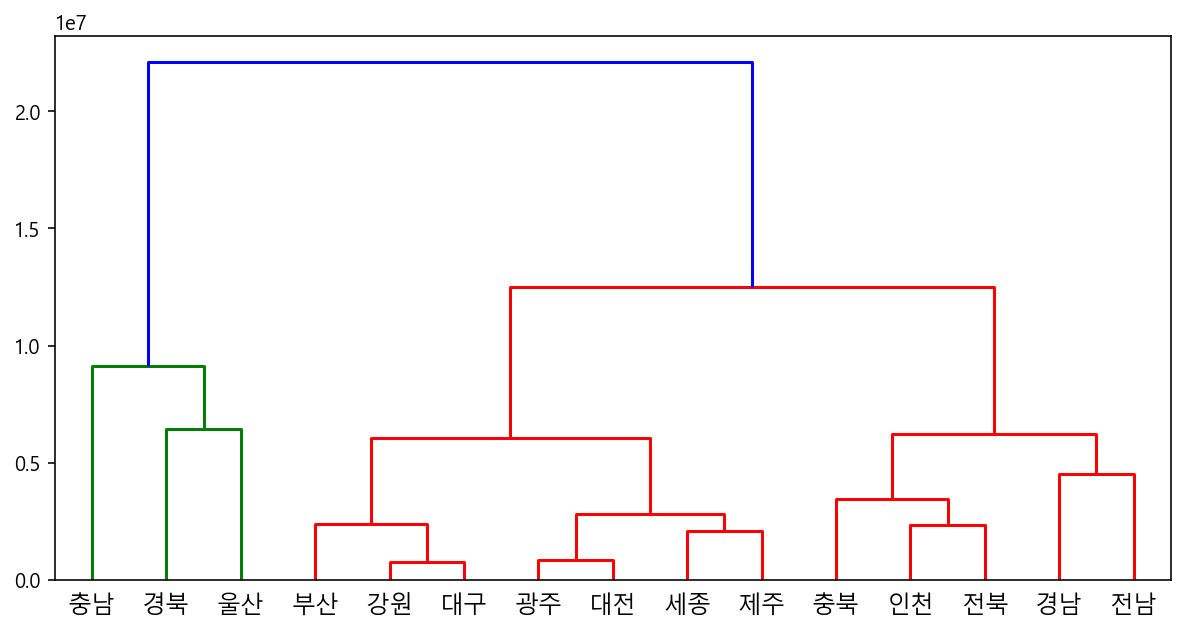

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='centroid')  
# method = ward, median, centroid, average, weightd, complete, single
dendrogram(link_dist, labels=list(power.index))
plt.show()

클러스터링 (KMeans)
--

In [13]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3).fit(power)
print(k.n_clusters)

3


In [14]:
k.labels_

array([1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2])

In [15]:
power['클러스터'] = k.labels_
power.shape

(15, 3)

In [16]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

서비스업       제조업
구분                   
강원  6203749   6002286
경남  8667737  18053778
경북  8487402  30115601
광주  3174973   2910768
대구  5470438   5862633

In [17]:
centers = k.cluster_centers_ ; centers

array([[ 6433742.33333333, 31018896.        ],
       [ 4191629.42857143,  3805868.14285714],
       [ 6245553.6       , 16144968.6       ]])

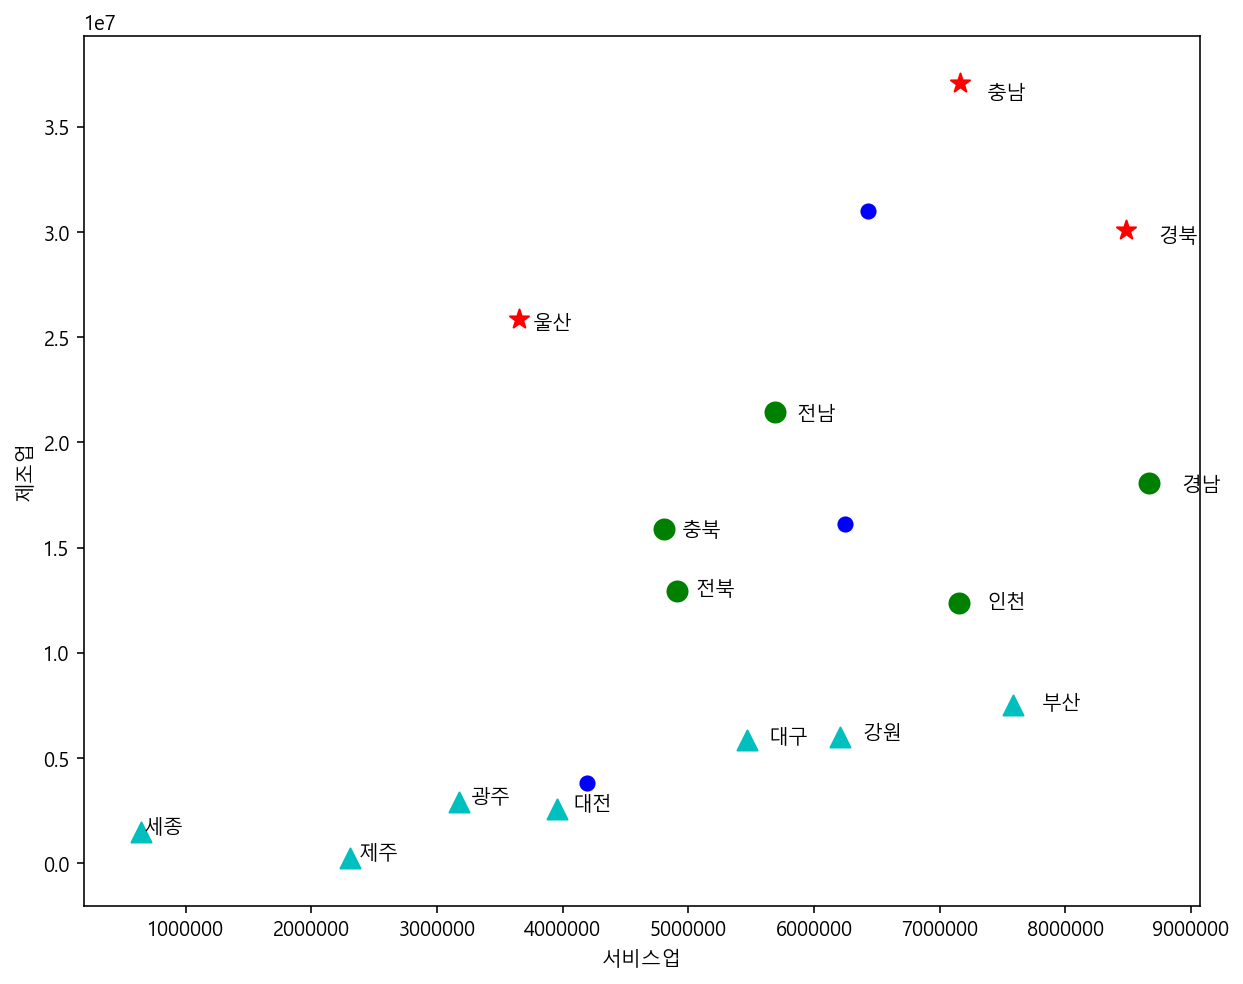

In [18]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'b', s= 50)

스케일링 (표준 정규화)
--

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

서비스업       제조업
구분                    
강원  0.393992 -0.676282
경남  1.498349  0.431200
경북  1.417523  1.539632
광주 -0.963503 -0.960380
대구  0.065323 -0.689116
대전 -0.613482 -0.988171
부산  1.011798 -0.537491
세종 -2.097244 -1.089755
울산 -0.750871  1.150686
인천  0.820080 -0.091316
전남  0.164025  0.743660
전북 -0.185723 -0.036357
제주 -1.351751 -1.205671
충남  0.824572  2.177606
충북 -0.233088  0.231756

정규화 이후의 클러스터링
--

In [20]:
Z = linkage(power, metric='euclidean', method='centroid') # ward 대신 씀
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [21]:
k = KMeans(n_clusters= 4).fit(power)

In [22]:
centers = k.cluster_centers_

In [23]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'k', s= 50)

<Figure size 432x288 with 0 Axes>

모든 특성을 고려한 크러스터링 (두개가 아니라)
--

In [24]:
power_data.head().T

0   1          2         3         4
구분           강원  개성         경기        경남        경북
주거용     1940933   0   16587710   4260988   3302463
공공용     1400421   0    5533662   1427560   1578115
서비스업    6203749   0   33434551   8667737   8487402
업무용합계   7604170   0   38968213  10095297  10065517
농림어업     607139   0    2371347   2141813   1747462
광업       398287   0     317263     95989    224568
제조업     6002286   0   56603327  18053778  30115601
식료품제조    546621   0    2544420    932743    566071
섬유,의류     13027   0    2109963    346974   3780171
목재,나무     19147   0     529274     60160     72680
펄프,종이     24382   0    1917458    817685    361772
출판,인쇄      7727   0     731348     28486     44402
석유,화확    175323   0    6881775   1865583   3653665
의료,광학     84397   0    1336390    178498    217771
요업      3695776   0    1728379    429920   1269917
1차금속    1038913   0    2020196   3809547  10874970
조립금속      39477   0    2302355   1699879    933178
기타기계      35063   0    3613798   1902913    782570
사무기기       2019   0     317244      8070     14468
전기기기      38062   0    1040171    924235    750786
영상,음향     43986   0   24519644    534196   4174971
자동차      113448   0    2977165   2156059   2356890
기타운송     108629   0      67594   2048646    123935
가구및기타     12872   0    1833112    262523     60280
재생재료       3418   0     133041     47662     77104
산업용합계   7007712   0   59291937  20291580  32087631
합계     16552816   0  114847859  34647864  45455611

In [25]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [26]:
power2.head()

주거용      공공용     서비스업     농림어업      광업       제조업   식료품제조    섬유,의류  \
구분                                                                          
강원  1940933  1400421  6203749   607139  398287   6002286  546621    13027   
경남  4260988  1427560  8667737  2141813   95989  18053778  932743   346974   
경북  3302463  1578115  8487402  1747462  224568  30115601  566071  3780171   
광주  1954876   565527  3174973    74608    2898   2910768  161072   295922   
대구  3151904   826396  5470438    69142    5858   5862633  212626  1057342   

    목재,나무   펄프,종이  ...      1차금속     조립금속     기타기계   사무기기    전기기기    영상,음향  \
구분                 ...                                                       
강원  19147   24382  ...   1038913    39477    35063   2019   38062    43986   
경남  60160  817685  ...   3809547  1699879  1902913   8070  924235   534196   
경북  72680  361772  ...  10874970   933178   782570  14468  750786  4174971   
광주   6782   41827  ...     75702   156396   198847   5967  236622   723764   
대구  16215  445646  ...    317580   661307   516493  58446  180189   252662   

        자동차     기타운송   가구및기타   재생재료  
구분                                   
강원   113448   108629   12872   3418  
경남  2156059  2048646  262523  47662  
경북  2356890   123935   60280  77104  
광주   512148     5140   13392  16049  
대구  1381273    68127   41814  33616  

[5 rows x 24 columns]

In [27]:
index_power = power2.index
column_power = power2.columns

In [28]:
index_power

Index(['강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북',
       '제주', '충남', '충북'],
      dtype='object', name='구분')

In [29]:
column_power

Index(['주거용', '공공용', '서비스업', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류', '목재,나무',
       '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속', '기타기계',
       '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료'],
      dtype='object')

In [30]:
list(column_power)

['주거용',
 '공공용',
 '서비스업',
 '농림어업',
 '광업',
 '제조업',
 '식료품제조',
 '섬유,의류',
 '목재,나무',
 '펄프,종이',
 '출판,인쇄',
 '석유,화확',
 '의료,광학',
 '요업',
 '1차금속',
 '조립금속',
 '기타기계',
 '사무기기',
 '전기기기',
 '영상,음향',
 '자동차',
 '기타운송',
 '가구및기타',
 '재생재료']

In [31]:
list(column_power).index('제조업'), list(column_power).index('서비스업')

(5, 2)

In [32]:
manufacture = list(column_power).index('제조업')
service = list(column_power).index('서비스업')

In [33]:
# list(column_power)

In [34]:
manufacture, service

(5, 2)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 이제 power3는 ndarray이다
power3 = scaler.fit_transform(power2)    # returns an array (not dataframe)

In [36]:
print(type(power2)), print(type(power3))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


(None, None)

In [37]:
Z = linkage(power3, metric='euclidean', method='centroid')  # ward 대신
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=index_power)
plt.show()

In [38]:
k = KMeans(n_clusters=4).fit(power3)

15


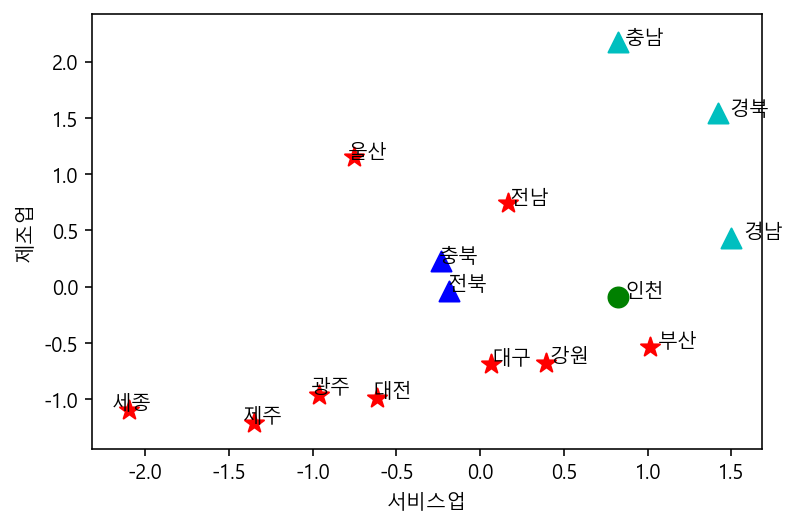

In [39]:
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(6, 4))
plt.xlabel('서비스업')
plt.ylabel('제조업')b

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3[n][service], power3[n][manufacture], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3[n][service]*1.05, power3[n][manufacture]*0.99, index_power[n])

In [50]:
print(k.labels_)

[0 1 1 0 0 0 0 0 0 2 0 3 0 1 3]


## DBSCAN(eps=, min_samples=,metric=) 
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
- metric: The metric to use when calculating distance between instances in a feature array. 

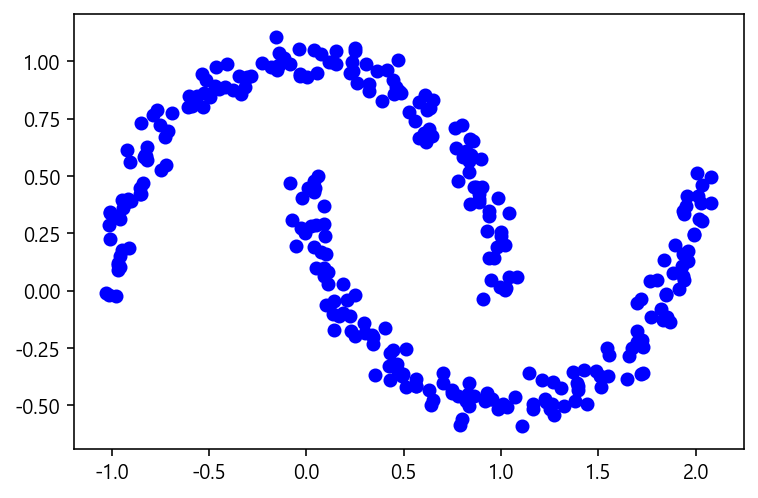

In [40]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)   # X :samples, y: label

# X,y

plt.scatter(X[:,0], X[:,1], c='b')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)   # returns a predicted array

predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [42]:
plt.scatter(X[:,0], X[:,1],c=predict)

In [43]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

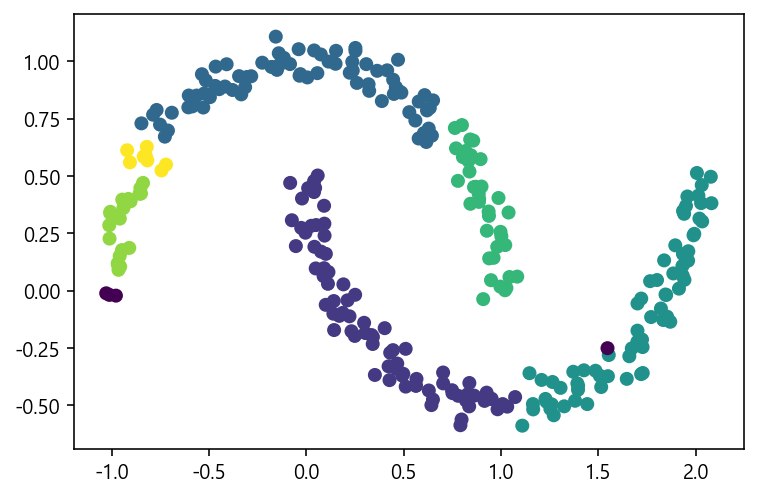

In [44]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

[-1 -1 -1  4 -1 -1 -1 -1  1 -1 -1 -1  2 -1 -1 -1  2  0 -1  7 -1 -1 -1 -1
 -1  2 -1 -1 -1 -1  5 -1 -1  7 -1  7 -1  0  1 -1 -1  4 -1  9 -1 -1  3 -1
  1 -1  0 -1 -1  2 -1 -1 -1 -1  5 -1  0 -1 -1  8 -1 -1 -1 -1  2  7  3  3
 -1 -1 -1 -1  6  6  3 -1 -1  8 -1  7 -1  4 -1  7 -1 -1  0 -1  7 -1 -1 -1
 -1  4 -1  8  4  5 -1 -1  0 -1 -1  4  4 -1 -1 -1 -1  3  2  9  3 -1  1  9
  6 -1  5 -1  0  3 -1  6 -1  5  5 -1  1 -1  8 -1 -1  6  4 -1 -1  2 -1 -1
 -1 -1 -1  9  1 -1 -1  0  0  4 -1  8 -1 -1  3  4 -1 -1 -1  4 -1 -1 -1 -1
  0  1  1 -1  4 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  3  0 -1 -1 -1
 -1 -1  9 -1 -1 -1  5  3 -1  5  4 -1  6 -1 -1  2  3  0 -1 -1 -1 -1 -1 -1
  0 -1  9 -1  9 -1 -1 -1 -1 -1  3 -1  2  5  1 -1 -1 -1 -1 -1 -1 -1 -1  7
 -1  7 -1 -1 -1 -1 -1  7  9 -1 -1 -1 -1 -1  0  2  2 -1  6 -1  6  6  2  0
 -1 -1 -1 -1  4  8  2 -1  8  3  9 -1  1  4 -1 -1 -1  5 -1 -1 -1 -1 -1 -1
  4 -1  6 -1 -1 -1 -1 -1 -1 -1  9 -1]


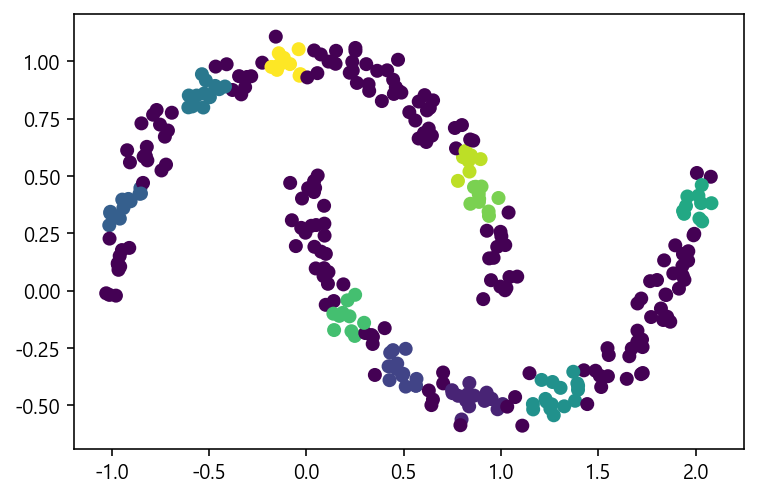

In [45]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
print(predict)
plt.scatter(X[:,0], X[:,1],c=predict)

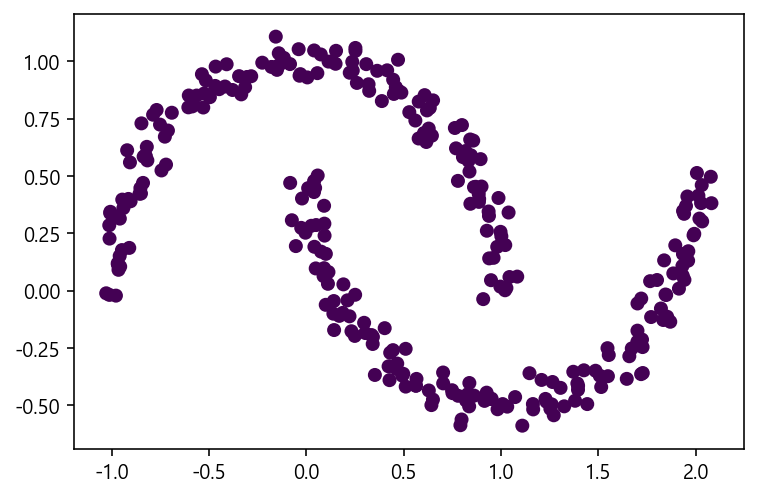

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [47]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

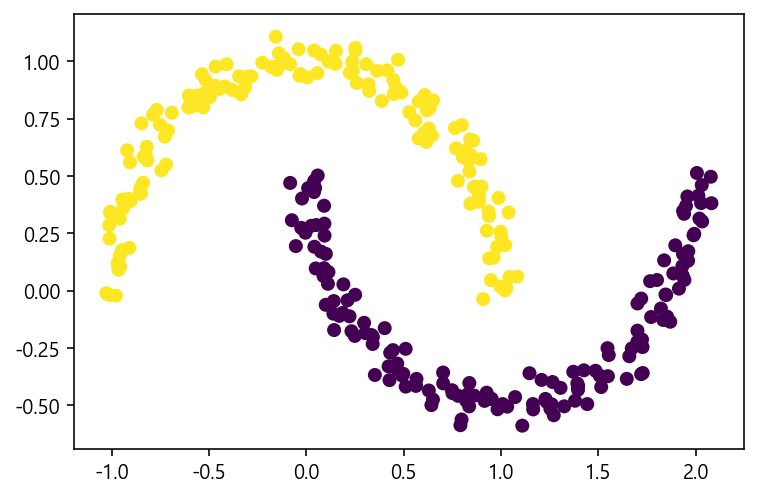

In [48]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [49]:
# for exercise
import matplotlib.pyplot as plt
color = np.array([-2,-1,0,1,2,3,4,5])
plt.scatter([0,1,2,3,4,5,6,7],[0,1,2,3,4,5,6,7],c=color)